# Inicialización
### Ponce Miguel

In [1]:
from skimage import io
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [2]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle, square

In [3]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola,threshold_minimum,threshold_mean,threshold_yen

from skimage.morphology import label
from skimage.measure import regionprops
from scipy import ndimage as ndi

In [4]:
from skimage import segmentation, color
from skimage.io import imread
from skimage.future import graph
from matplotlib import pyplot as plt

In [5]:
import numpy as np

In [6]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()
def imshowcolor(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

## Cargar la imagen

In [7]:
def umbral_imagen(imagen,val_tres):
    img_tres = imagen>val_tres
    return img_tres

In [37]:
def segmentar_imagen(imagen):
    img_segmentos = segmentation.slic(imagen, compactness=90, n_segments=5200,sigma=0.5)
    superpixels = color.label2rgb(img_segmentos, imagen, kind='avg')
    nodos = graph.rag_mean_color(imagen, img_segmentos)
    etiquetas = graph.cut_threshold(img_segmentos, nodos, 5)
    img_segmentada = color.label2rgb(etiquetas, imagen, kind='avg', bg_label=0)
    return img_segmentada

In [10]:
def remover_segmentos(imagen,imagen_ppm):
    (fil,col) = imagen.shape
    img_resultado=imagen.copy()
    for i in range(fil):
        for j in range(col):
            if imagen_ppm[i,j] == True:
                img_resultado[i,j]=0
    return img_resultado

In [31]:
def graficar_regiones(imagen):
    label_imagen = label(imagen,connectivity=1)    
    if min_area_region == 0 and max_area_region == 0:
        reg_props = regionprops(label_imagen)
        return len(reg_props)    
    else:
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.imshow(imagen, cmap=plt.cm.gray)
        contador = 0
        for region in regionprops(label_imagen):
            if min_area_region < region.area  and region.area< max_area_region:                        
                minr, minc, maxr, maxc = region.bbox
                bx = (minc, maxc, maxc, minc, minc)
                by = (minr, minr, maxr, maxr, minr)
                ax.plot(bx, by, '-b', linewidth=2.5)  
                contador += 1
        plt.show()
        return contador

# Escribe tu código aquí

In [12]:
min_area_region = 1
max_area_region = 5

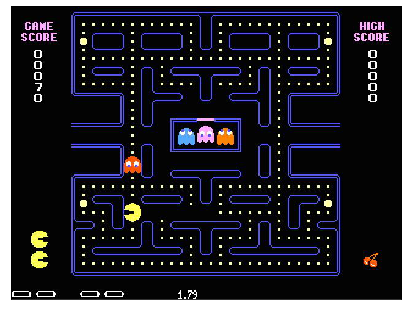

In [13]:
pacmanTablero = io.imread('img/pacmanjuego.jpeg')
imshowcolor(pacmanTablero)

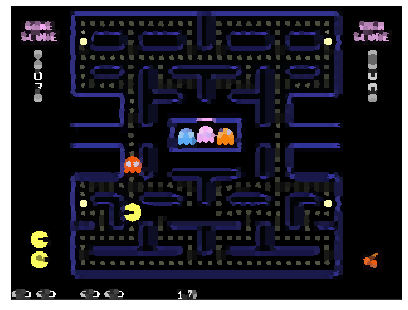

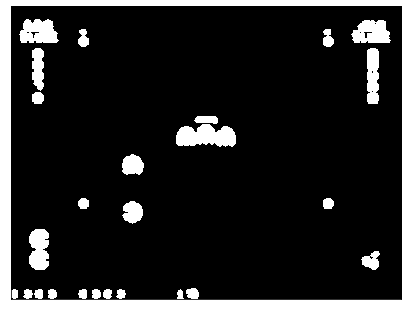

In [39]:
img_segmentada = segmentar_imagen(pacmanTablero)
imshowcolor(img_segmentada)
img_segmentada_bn = rgb2gray(img_segmentada)
pacman_seg_bn=umbral_imagen(img_segmentada_bn,threshold_otsu(img_segmentada_bn))
img_seg_dilation = dilation(pacman_seg_bn,disk(3))
imshow(img_seg_dilation)

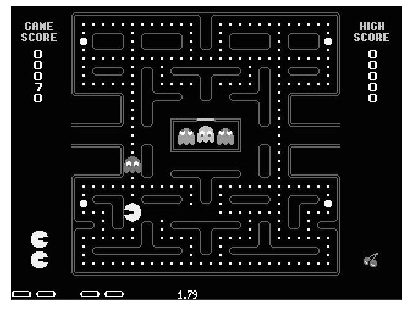

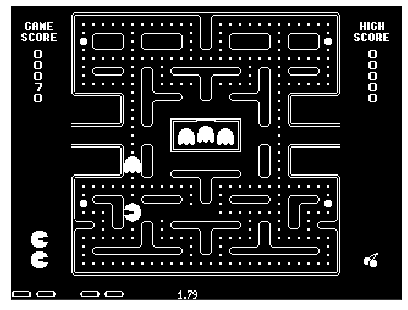

In [40]:
pacmanTableroBN = rgb2gray(pacmanTablero)
imshow(pacmanTableroBN)
imagen_seg_bn = umbral_imagen(pacmanTableroBN,threshold_otsu(pacmanTableroBN))
imshow(imagen_seg_bn)

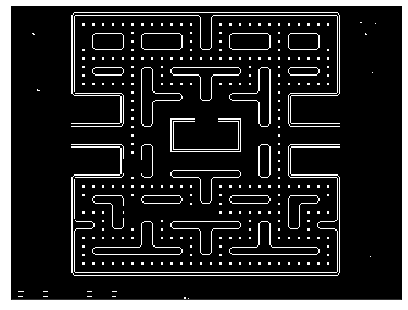

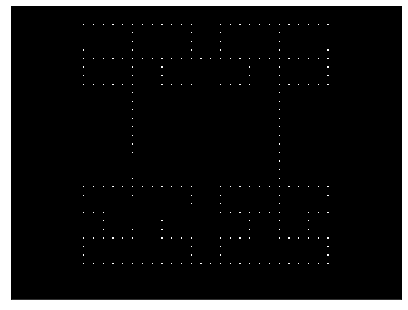

In [44]:
img_resultado = remover_segmentos(imagen_seg_bn,img_seg_dilation)
imshow(img_resultado)
img_res_erosion = erosion(img_resultado, square(3))
imshow(img_res_erosion)

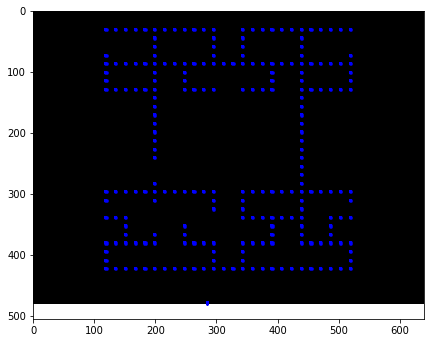

Ndiscos 228


In [45]:
ndiscos=graficar_regiones(img_res_erosion)
print("Ndiscos",ndiscos)

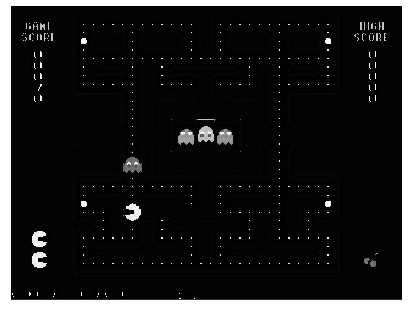

In [27]:
img_bn = rgb2gray(pacmanTablero)
img_seg_dilation = erosion(img_bn,disk(1))
imshow(img_seg_dilation)

In [28]:
img_segmentada = segmentar_imagen_bn(img_seg_dilation)
imshowcolor(img_segmentada)
img_segmentada_bn = rgb2gray(img_segmentada)
pacman_seg_bn=umbral_imagen(img_segmentada_bn,threshold_otsu(img_segmentada_bn))
img_seg_dilation = dilation(pacman_seg_bn,disk(3))
imshow(img_seg_dilation)

KeyboardInterrupt: 

In [ ]:
pacman_seg_bn=umbral_imagen(img_seg_dilation,threshold_local(img_seg_dilation, 297,  'gaussian'))
imshow(pacman_seg_bn)

In [ ]:

img_segments = segmentation.slic(pacman_seg_bn, compactness=20, n_segments=250)
superpixels = color.label2rgb(img_segments, img_closing, kind='avg')
imshow(superpixels)
gray_out2 = rgb2gray(superpixels)
imshow(gray_out2)

In [ ]:
from skimage.filters import try_all_threshold
pacman_out_ppm=umbral_imagen(gray_out2,threshold_otsu(gray_out2))
pacman_out_ppm= dilation(pacman_out_ppm,square(5))
imshow(pacman_out_ppm)

In [ ]:
img_resultado = remover_segmentos(imagen_seg_bn,pacman_out_ppm)
imshow(img_resultado)
img_res_erosion = erosion(img_resultado, square(3))
imshow(img_res_erosion)

In [ ]:
img_dilatacion = dilation(pacmanTableroBN,disk(1))
imshow(img_dilatacion)
img_closing = closing(img_dilatacion)
imshow(img_closing)

In [ ]:
import numpy as np
from skimage.morphology import square
imagen = umbral_imagen(pacmanTableroBN,threshold_local(pacmanTableroBN, 151,  'gaussian'))
imshow(erosion(pacmanTableroBN, square(3)))

In [ ]:

imshow(imagen)

In [ ]:
from skimage import segmentation, color
from skimage.io import imread
from skimage.future import graph
from matplotlib import pyplot as plt
img_segments = segmentation.slic(img_closing, compactness=15, n_segments=670)
superpixels = color.label2rgb(img_segments, img_closing, kind='avg')
imshow(superpixels)
gray_out2 = rgb2gray(superpixels)
imshow(gray_out2)

In [ ]:
from skimage.filters import try_all_threshold
pacman_out_ppm=umbral_imagen(gray_out2,threshold_otsu(gray_out2))
imshow(pacman_out_ppm)

In [ ]:
(fil,col) = imagen.shape
img_out=img_closing.copy()
for i in range(fil):
    for j in range(col):
        if pacman_out_ppm[i,j] == True:
            img_out[i,j]=0
imshow(img_out)        

pacman_out_ppm2=umbral_imagen(img_out,threshold_otsu(img_out))
imshow(pacman_out_ppm2)
nlabels = label(img_out,connectivity=1)
regions = regionprops(nlabels)
print(len(nlabels))
print(len(regions))

In [ ]:
min_area_region = 7
max_area_region = 50
def contar_regiones(imagen):
    label_imagen = label(imagen,connectivity=1)    
    if min_area_region == 0 and max_area_region == 0:
        reg_props = regionprops(label_imagen)
        return len(reg_props)
    else:
        contador = 0
        for region in regionprops(label_imagen):        
            if min_area_region < region.area  and region.area< max_area_region:            
                contador += 1
        return contador

In [ ]:
def graficar_regiones(imagen):
    label_imagen = label(imagen,connectivity=1)    
    if min_area_region == 0 and max_area_region == 0:
        reg_props = regionprops(label_imagen)
        return len(reg_props)    
    else:
        fig, ax = plt.subplots()
        ax.imshow(imagen, cmap=plt.cm.gray)
        contador = 0
        for region in regionprops(label_imagen):
            if min_area_region < region.area  and region.area< max_area_region:                        
                minr, minc, maxr, maxc = region.bbox
                bx = (minc, maxc, maxc, minc, minc)
                by = (minr, minr, maxr, maxr, minr)
                ax.plot(bx, by, '-b', linewidth=2.5)  
                contador += 1
        plt.show()
        return contador    

In [ ]:
print(contar_regiones(pacman_out_ppm2))
graficar_regiones(pacman_out_ppm2)

In [ ]:
umbral_imagen(pintura_puntos,threshold_local(pintura_puntos,51, 'mean'))

In [ ]:
##Adapatativo umbral para cada PIXEL, coge un generico y lo palica para varias imagenes
umbral_imagen(pintura_puntos,threshold_niblack(pintura_puntos,window_size=31, k=1e-4))

# Posible resultado

### Contar el numero de puntos primero para comparar

In [ ]:
Posible resultado